# Project: Investigate a dataset

Our goal in this project is to study the which factors made the passengers of the Titanic more likely to survive. To do so we will analyze a dataset containing information about them. During this work we will address and find an answer to the following questions: 

##### Which was the mean probability of the passengers on board? 
##### Is it uniform for all the classes or is there a correlation between these two variables? 
##### Does the survival rate depend on other factors like gender or age? If so, how is this dependence? 
##### Can we guess something about the evacuation procedure or priority of leaving the boat from the previous answers? 

The project will be organized as follows: first, we will start with the data wrangling. We will look for possible null values into the provided data and purge those ones which affect to the variables that we are interested in. In the passenger's classification section we will show simple statistics about the age and age and class of the passengers. We will analyze the survival rates and answer the above-formulated questions. In the last section we will conclude and summarize our results and also we will present some limitations of this analysis.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
#import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Loading the csv Titanic data
path_data = "./titanic-data.csv"
data_o = pd.read_csv(path_data)

# I added a new column containig the information about passangers that did not survived
# It uses the same "legend" that the Survived one: 1 = True and 0 = False
non_survived = (data_o["Survived"]+1) % 2
data_o.insert(2, "Non_Survived", non_survived)

# Checking the variables provided in titanic-data.csv + "Non_Survived"
print "Types of titanic-data.csv\n"
print data_o.dtypes
print

# Passenger data classified by class and gender
data_o_c = data_o.groupby(["Pclass"], as_index = True)
data_o_cg = data_o.groupby(["Pclass","Sex"], as_index = True)

Types of titanic-data.csv

PassengerId       int64
Survived          int64
Non_Survived      int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object



## Data wrangling.

Before jumping into the analysis is necessary to check the content of the data. It is important to verify if there are empty slots where the information is not available. The code below will print the missing places in the data. We can see that the NaN values appear only in three categories/columns: "Age", "Cabin"-number and Embarked. The three variables that we will study during this analysis are age, class and gender. Because of this, we are going to purge the empty data corresponding to the passenger's age to ensure that we are not including meaningless data in the analysis.  Therefore, after cleaning process we will reduce the size of the database from 891 to 714 passengers.

In [5]:
# Data cleaning process
# Here we check if the 
dn = data_o.isnull()

print "Number of elements per category/data_type with empty information"
print
print dn.sum()
print "Length original data", len(data_o)

Number of elements per category/data_type with empty information

PassengerId       0
Survived          0
Non_Survived      0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64
Length original data 891


In [6]:
# This definition removes NaN values from the columns col = ['col1', 'col2', ...]
def purge_data(data, col = ['Age']):
    return data.dropna(subset = col)

# Here we purgue the data and re-initialize the data_c and data_cg data-groups
data = purge_data(data_o)
data_c = data.groupby(["Pclass"], as_index = True)
data_cg = data.groupby(["Pclass","Sex"], as_index = True)
print "Length original data:", len(data_o)
print "Length purgued data:", len(data)

Length original data: 891
Length purgued data: 714


## Data analysis

### Passenger's classification

In this section we will show some simple average statistics related with the passengers class. We will see how was the distribution of the customers on board according to the class and gender. A priori one should not expect a uniform amount of travelers per class. The Titanic was build to serve as an exclusive resort facility for the high class. However, the high class was not so numerous and the exclusiveness of this tickets may have influenced the number of first class customers vs second/third class ones.

In [7]:
def data_num_pass(data_in):
    # This definition returns the number of passengers and percentage of a given data_in DataFrame
    data_out = data_in[["PassengerId"]]
    data_out = data_out.count()
    data_out.columns=["Number_of_passengers"]
    total_pass = data_out.sum()["Number_of_passengers"]
    data_out.insert(1,"Percentage", 100*data_out/total_pass)
    #print data_out
    
    return data_out


pass_cg = data_num_pass(data_cg)
pass_c = data_num_pass(data_c)

# Data of number of passengers classified by class and gender
print "TABLE I (a)"
print pass_c
print
print "TABLE I (b)"
print pass_cg
print
print "TABLE I: Absolute numbers (a) and relative percentages (b) of passengers on board.\
 The data was groupped in two different ways: by passengers class and by passengers class and gender."

TABLE I (a)
        Number_of_passengers  Percentage
Pclass                                  
1                        186   26.050420
2                        173   24.229692
3                        355   49.719888

TABLE I (b)
               Number_of_passengers  Percentage
Pclass Sex                                     
1      female                    85   11.904762
       male                     101   14.145658
2      female                    74   10.364146
       male                      99   13.865546
3      female                   102   14.285714
       male                     253   35.434174

TABLE I: Absolute numbers (a) and relative percentages (b) of passengers on board. The data was groupped in two different ways: by passengers class and by passengers class and gender.


From the above table and the piecharts below (Fig. 1) we can see that the number of customers on board is not uniformly distributed among the three classes The unreachability and exclusiveness of the first class tickets for the middle class and poor travelers may have influenced that only the 26% of passengers belonged to the first class in contrast with the 49% of the third class.

We went further and we segregated the data by gender. The Table I (b) shows the distribution of passengers per class and gender. Male-female distribution is roughly uniform (50%-50%) among the two first classes but not in the third one. In the third class the male travelers outnumber the female ones (63.44% men vs. 36.56%). One reason for this could be the immigration. Some low-class customers may be traveling to New York trying to find jobs to take care of themselves and/or their family.

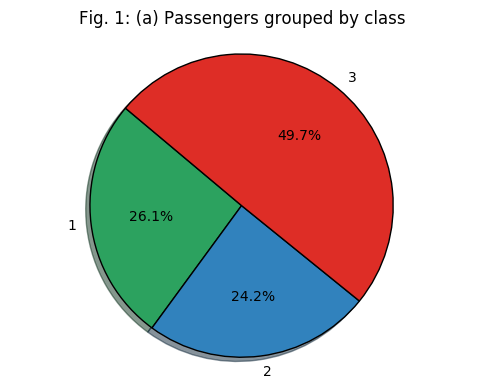

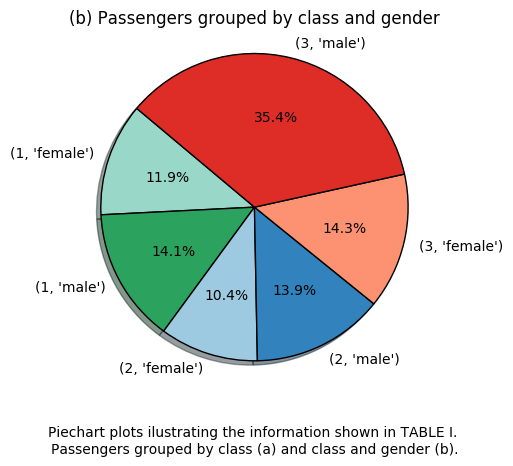

In [8]:
# Here we the Piecharts showing the information in "TABLE I" are coded

sizes1 = pass_c["Number_of_passengers"]
sizes2 = pass_cg["Number_of_passengers"]
labels1 = pass_c.index
labels2 = pass_cg.index
colors1 = ['#2ca25f','#3182bd','#de2d26']
colors2 = ['#99d8c9','#2ca25f','#9ecae1','#3182bd','#fc9272','#de2d26']

plt.title("Fig. 1: (a) Passengers grouped by class\n")
plt.pie(sizes1, labels=labels1, colors = colors1, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()
plt.title("(b) Passengers grouped by class and gender\n")
plt.pie(sizes2, labels=labels2, colors = colors2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.text(0, -1.6, 'Piechart plots ilustrating the information shown in TABLE I. \nPassengers grouped by class (a) and class and gender (b).', ha='center')
plt.show()

Finally, we show in Fig. 2 the total amount of passengers classified by class, gender and age. We observe that, for the same class, the male distributions are broader and have the maximum peak at an older age than the female one. The population on board was mainly formed by (young) adults of 20-40 years old. In the next section, we present also some average values about the age of the different classes together with survival rates. We will come back later to this passengers classification when we analyze the survival probability per class, gender and age.

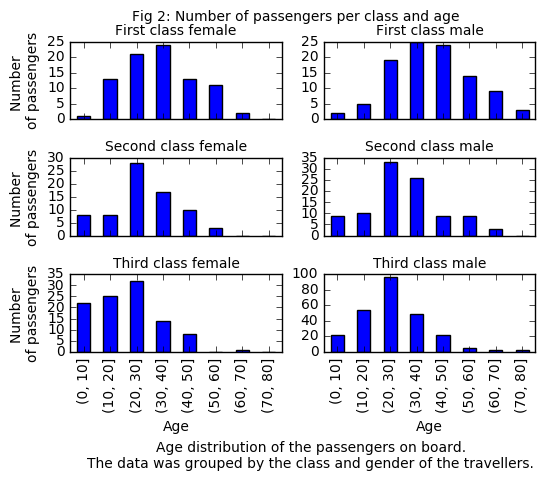

In [9]:
# What about the age, is this factor correlated with the survival?
# Plot1

def age_survival(d, var):
    # This definition counts or average the number of passengers arranged by age
    # I took the np.arange(0, 90, 10) to arrange intervals of 10 years
    d_cut = pd.cut(d["Age"], np.arange(0, 90, 10))
    if var == "count":
        return d.groupby(d_cut).sum()
    if var == "mean":
        return d.groupby(d_cut).mean()

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.suptitle("Fig 2: Number of passengers per class and age", fontsize=10)
fig.subplots_adjust(hspace=.5)

for i in range(1,4):
    cj = 0
    for j in ["female","male"]:
        #print (i, cj)
        #print (i, j
        age_ij = age_survival(data_cg.get_group((i,j)), "count")
        if i == 1:
            c_t = 'First class'
        elif i == 2:
            c_t = 'Second class'
        else:
            c_t = 'Third class'
            
        total_ij = age_ij["Non_Survived"] + age_ij["Survived"]
        total_ij.plot.bar(ax=axes[i-1,cj],label = "Non Survided")
        
        axes[i-1,cj].set_title(c_t+" "+j, fontsize=10)
        #axes[i-1,cj].set_yticks(numpy.arange(0,1.2,0.2))
        #print age_ij
        if i == 3:
            pass
        else:
            axes[i-1,cj].set_xticklabels([])
            axes[i-1,cj].set_xlabel("")
        if j == "female":
            axes[i-1,cj].set_ylabel("Number \nof passengers")
        cj += 1
plt.text(-1, -150, 'Age distribution of the passengers on board.\nThe data was grouped by the class and gender of the travellers.', ha='center')

### Survival rates

Now that we have an idea about the passenger distribution we can analyze the survival rates and see how they depend on other variables such as age or class. We will see that there is clearly a correlation between class/class and gender and the survival probability shown in Fig. 3-5.

In [10]:
def print_mean(data, keys):
    # This definition prints the mean values of a given 'key' of a given DataFrame
    print data.mean()[keys]
    print

print "Mean values over all the data:\n"
print_mean(data, ["Survived","Age","Fare"])

print "Mean values groupped by class:\n"
print_mean(data_c, ["Survived","Age","Fare"])

print "Mean values groupped by class and gender:\n"
print_mean(data_cg, ["Survived","Age","Fare"])


Mean values over all the data:

Survived     0.406162
Age         29.699118
Fare        34.694514
dtype: float64

Mean values groupped by class:

        Survived        Age       Fare
Pclass                                
1       0.655914  38.233441  87.961582
2       0.479769  29.877630  21.471556
3       0.239437  25.140620  13.229435

Mean values groupped by class and gender:

               Survived        Age        Fare
Pclass Sex                                    
1      female  0.964706  34.611765  107.946275
       male    0.396040  41.281386   71.142781
2      female  0.918919  28.722973   21.951070
       male    0.151515  30.740707   21.113131
3      female  0.460784  21.750000   15.875369
       male    0.150198  26.507589   12.162695



We have calculated that the overall probability to survive the sank is already 40%. If we classify the data into classes and gender we can see that this global probability is not a reliable quantity. The probability of survival vs. class and gender shown in the table/text above is also plotted in Fig. 3. We observed that the survival rates strongly depend on the class (first class passenger had more chances to survive than a second one and so on). Also, it is important to mention that the female passengers in average had more than twice the probability to outcome the disaster than the male ones in the same class. This high average survival values for the female passengers may show some clues about the disembarkment procedure like allowing the women to enter the safeboats in first place.

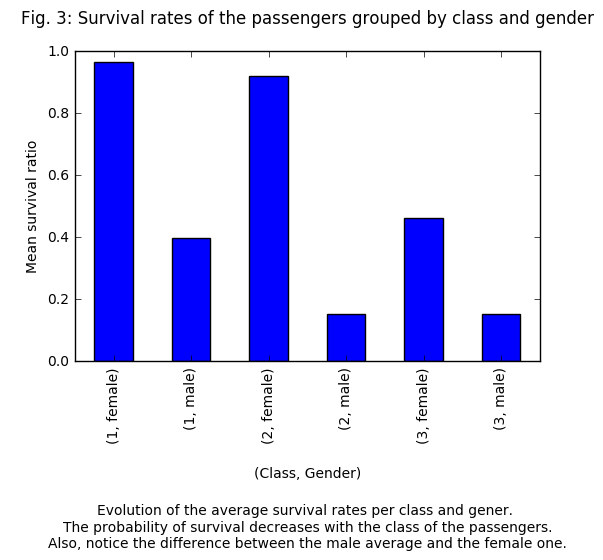

In [11]:
# Survival rates of the passengers grouped by class and gender
mean_data = data_cg.mean()
mean_data["Survived"].plot.bar()
plt.title("Fig. 3: Survival rates of the passengers grouped by class and gender\n")
plt.xlabel("\n(Class, Gender)")
plt.ylabel("\nMean survival ratio")
plt.text(2.5, -0.6, 'Evolution of the average survival rates per class and gener. \nThe probability of survival decreases with the class of the passengers.\nAlso, notice the difference between the male average and the female one.', ha='center')

We have also investigated how the survival rates depend on the age of the passengers. We have divided the data into groups with intervals on 10 years old. In Fig. 4 we show the number of passengers that survived the disaster in blue and the total number of customers in red. To make a comparison/modification with the result shown in Fig. 3 we have calculated the probability distribution of each class and gender with the age. From these histograms in Fig. 5 we observe that the women and children with [0-10) years old had more probability to survive the accident than the male passengers within the same class. Almost all female travelers from the first and second class survived the incident. In contrast, we have the females of the third class that had a similar survival rate to the males in the first class. This could indicate some interplay between the class and the gender in order to be evacuated. Finally, notice the [20,90) years old males from the second and third class which had a survival rate of 0-20%. Let's not forget they represented the 49% of the population on board. From the histograms of Fig.5 we can guess that the women and children had priority to leave the boat following at that time the common "women and children first", although the probability drop in the female passengers of the third class with respect of the males of the first class could be an indication that the class could have altered this protocol. 

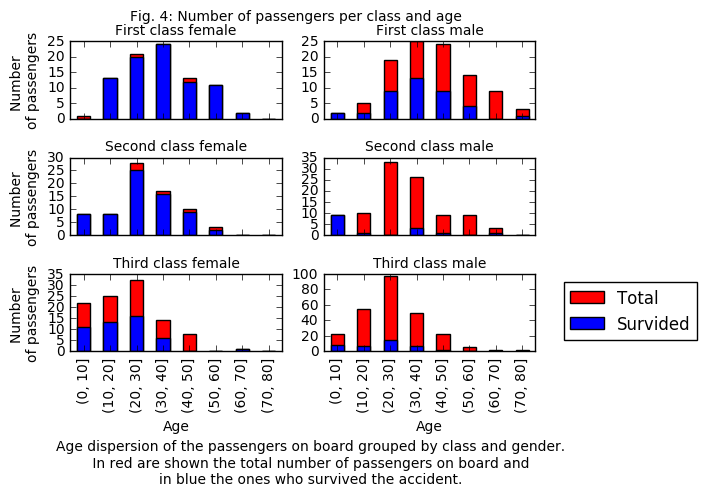

In [12]:
# How many of the passengers of Plot1 (age distribution per class and gender) have survived?

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Fig. 4: Number of passengers per class and age", fontsize=10)

for i in range(1,4):
    cj = 0
    for j in ["female","male"]:
        #print (i, cj)
        #print (i, j
        age_ij = age_survival(data_cg.get_group((i,j)), "count")
        if i == 1:
            c_t = 'First class'
        elif i == 2:
            c_t = 'Second class'
        else:
            c_t = 'Third class'
            
        total_ij = age_ij["Non_Survived"] + age_ij["Survived"]
        total_ij.plot.bar(ax=axes[i-1,cj],color='red',label = "Total")
        age_ij["Survived"].plot.bar(ax=axes[i-1,cj],label = "Survided")
        
        axes[i-1,cj].set_title(c_t+" "+j, fontsize=10)
        #axes[i-1,cj].set_yticks(numpy.arange(0,1.2,0.2))
        #print age_ij
        if i == 3:
            pass
        else:
            axes[i-1,cj].set_xticklabels([])
            axes[i-1,cj].set_xlabel("")
        if j == "female":
            axes[i-1,cj].set_ylabel("Number \nof passengers")
        cj += 1
        
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 1))
plt.text(-1, -170, 'Age dispersion of the passengers on board grouped by class and gender.\n In red are shown the total number of passengers on board and \nin blue the ones who survived the accident.', ha='center')


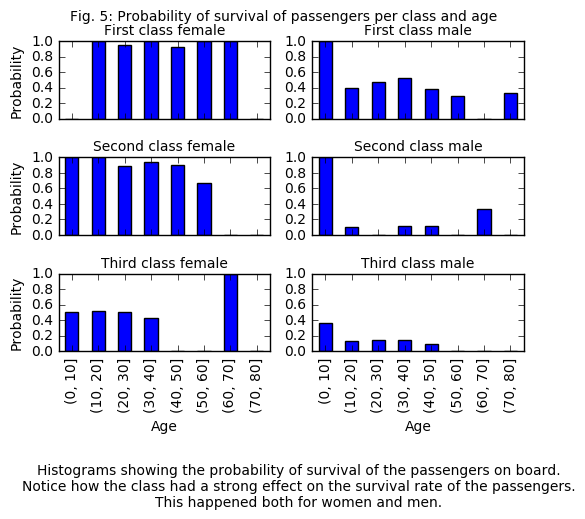

In [16]:
# What about the age, is this factor correlated with the survival?
# What is the distribution of probability?

# 1st class
# print data_cg.mean()

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.subplots_adjust(hspace=.5)
fig.suptitle("Fig. 5: Probability of survival of passengers per class and age", fontsize=10)
for i in range(1,4):
    cj = 0
    for j in ["female","male"]:
        #print (i, cj)
        #print (i, j
        #age_ij = mean_age_survival(data_cg.get_group((i,j)))
        age_ij = age_survival(data_cg.get_group((i,j)), "mean")
        #c_age_ij = mean_age_survival(data_cg.get_group((i,j)))
        if i == 1:
            c_t = 'First class'
        elif i == 2:
            c_t = 'Second class'
        else:
            c_t = 'Third class'
            
        #print count_age_survival(data_cg.get_group((i,j)))
        #(age_ij["Non_Survived"] + age_ij["Survived"]).plot.bar(ax=axes[i-1,cj], color = 'Red')
        age_ij["Survived"].plot.bar(ax=axes[i-1,cj])
        axes[i-1,cj].set_title(c_t+" "+j, fontsize = '10')
        axes[i-1,cj].set_yticks(numpy.arange(0,1.2,0.2))
        if i == 3:
            pass
        else:
            axes[i-1,cj].set_xticklabels([])
            axes[i-1,cj].set_xlabel("")
        if j == "female":
            axes[i-1,cj].set_ylabel("Probability")
        cj += 1
        
plt.text(-1, -2, 'Histograms showing the probability of survival of the passengers on board.\nNotice how the class had a strong effect on the survival rate of the passengers.\nThis happened both for women and men.', ha='center')





### Conclusions

We have studied how the age, gender and passenger class (one can also see here a relation with the social class) were related to the passenger's survival probability. We have found that women and children had higher chances to outcome the sank. We also found that the class of the passengers influenced the survival given the similarity between the first class males and the third class females histograms.

It is important also to notice that we did not consider in our analysis the data from the crew. This would lower the overall survival ratio considering the fact that the most part of them did not survive the disaster because the passengers had priority to disembark.  Also, we did not consider any technical details like the internal structure of the boat, the number of lifeboats or where the different classes of travelers were living. All these elements could have been important to explain the difference between the survival rates between the third class and the rest.